In [25]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

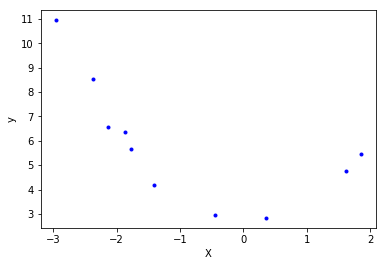

In [26]:
data = np.array([[ -2.95507616,  10.94533252],
       [ -0.44226119,   2.96705822],
       [ -2.13294087,   6.57336839],
       [  1.84990823,   5.44244467],
       [  0.35139795,   2.83533936],
       [ -1.77443098,   5.6800407 ],
       [ -1.8657203 ,   6.34470814],
       [  1.61526823,   4.77833358],
       [ -2.38043687,   8.51887713],
       [ -1.40513866,   4.18262786]])
m = data.shape[0]  # 样本大小
X = data[:, 0].reshape(-1, 1)  # 将array转换成矩阵
y = data[:, 1].reshape(-1, 1)
plt.plot(X, y, "b.")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

[4.97857827] [[-0.92810463]]


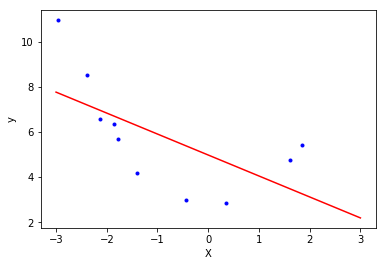

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)  # [ 4.97857827] [[-0.92810463]]

X_plot = np.linspace(-3, 3, 1000).reshape(-1, 1)
y_plot = np.dot(X_plot, lin_reg.coef_.T) + lin_reg.intercept_
plt.plot(X_plot, y_plot, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.savefig('regu-2.png', dpi=200)

In [28]:
h = np.dot(X.reshape(-1, 1), lin_reg.coef_.T) + lin_reg.intercept_
print(mean_squared_error(h, y)) # 3.34

3.3363076332788486


In [29]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X_poly)

[[-2.95507616  8.73247511]
 [-0.44226119  0.19559496]
 [-2.13294087  4.54943675]
 [ 1.84990823  3.42216046]
 [ 0.35139795  0.12348052]
 [-1.77443098  3.1486053 ]
 [-1.8657203   3.48091224]
 [ 1.61526823  2.60909145]
 [-2.38043687  5.66647969]
 [-1.40513866  1.97441465]]


[2.60996757] [[-0.12759678  0.9144504 ]]


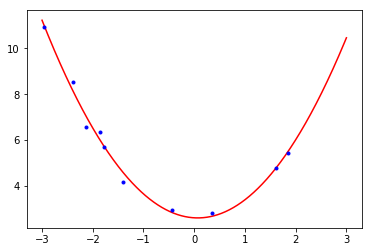

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)  # [ 2.60996757] [[-0.12759678  0.9144504 ]]

X_plot = np.linspace(-3, 3, 1000).reshape(-1, 1)
X_plot_poly = poly_features.fit_transform(X_plot)
y_plot = np.dot(X_plot_poly, lin_reg.coef_.T) + lin_reg.intercept_
plt.plot(X_plot, y_plot, 'r-')
plt.plot(X, y, 'b.')
plt.show()

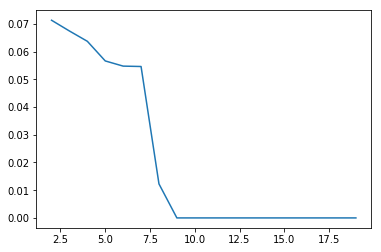

In [31]:
# test different degree and return loss
def try_degree(degree, X, y):
    poly_features_d = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_d = poly_features_d.fit_transform(X)
    lin_reg_d = LinearRegression()
    lin_reg_d.fit(X_poly_d, y)
    return {'X_poly': X_poly_d, 'intercept': lin_reg_d.intercept_, 'coef': lin_reg_d.coef_}

degree2loss_paras = []
xxx = []
yyy = []

for i in range(2, 20):
    paras = try_degree(i, X, y)
    h = np.dot(paras['X_poly'], paras['coef'].T) + paras['intercept']
    _loss = mean_squared_error(h, y)
    xxx.append(i)
    yyy.append(_loss)
    degree2loss_paras.append({'d': i, 'loss': _loss, 'coef': paras['coef'], 'intercept': paras['intercept']})

plt.plot(xxx,yyy)
plt.show()